In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
!pip install pysqlite3

  Using cached pysqlite3-0.4.2.tar.gz (40 kB)
  Running setup.py clean for pysqlite3
Failed to build pysqlite3
    Running setup.py install for pysqlite3: started
    Running setup.py install for pysqlite3: finished with status 'done'


  Command arguments: 'C:\Users\hp\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\hp\\AppData\\Local\\Temp\\pip-install-5hy3klkw\\pysqlite3\\setup.py'"'"'; __file__='"'"'C:\\Users\\hp\\AppData\\Local\\Temp\\pip-install-5hy3klkw\\pysqlite3\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\hp\AppData\Local\Temp\pip-wheel-zxpnnslh'
  Command output: [use --verbose to show]


In [3]:
covid19 = pd.read_csv('covid_19_cases.csv')

C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
covid19.head()

,case_type,people_total_tested_count,cases,difference,date,combined_key,country_region,province_state,admin2,iso2,iso3,fips,lat,long,population_count,people_hospitalized_cumulative_count,data_source,prep_flow_runtime
0,Confirmed,NaN,0,0,2020-02-03,Switzerland,Switzerland,NaN,NaN,CH,CHE,NaN,46.8182,8.2275,8654618.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,2020-05-02T23:35:41
1,Deaths,NaN,0,0,2020-03-01,Cyprus,Cyprus,NaN,NaN,CY,CYP,NaN,35.1264,33.4299,1207361.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,2020-05-02T23:35:41
2,Confirmed,NaN,23,0,2020-04-21,Antigua and Barbuda,Antigua and Barbuda,NaN,NaN,AG,ATG,NaN,17.0608,-61.7964,97928.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,2020-05-02T23:35:41
3,Deaths,NaN,0,0,2020-02-11,Jamaica,Jamaica,NaN,NaN,JM,JAM,NaN,18.1096,-77.2975,2961161.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,2020-05-02T23:35:41
4,Confirmed,NaN,0,0,2020-02-06,Belize,Belize,NaN,NaN,BZ,BLZ,NaN,17.1899,-88.4976,397621.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,2020-05-02T23:35:41


In [5]:
covid19.shape

(718080, 18)

In [6]:
covid19.columns


Index(['case_type', 'people_total_tested_count', 'cases', 'difference', 'date',
       'combined_key', 'country_region', 'province_state', 'admin2', 'iso2',
       'iso3', 'fips', 'lat', 'long', 'population_count',
       'people_hospitalized_cumulative_count', 'data_source',
       'prep_flow_runtime'],
      dtype='object')

In [7]:
covid19.info

<bound method DataFrame.info of         case_type  people_total_tested_count  cases  difference        date  \
0       Confirmed                        NaN      0           0  2020-02-03   
1          Deaths                        NaN      0           0  2020-03-01   
2       Confirmed                        NaN     23           0  2020-04-21   
3          Deaths                        NaN      0           0  2020-02-11   
4       Confirmed                        NaN      0           0  2020-02-06   
...           ...                        ...    ...         ...         ...   
718075  Confirmed                        NaN      0           0  2020-01-22   
718076     Deaths                        NaN      0           0  2020-01-22   
718077     Deaths                        NaN      0           0  2020-01-22   
718078  Confirmed                        NaN      0           0  2020-01-22   
718079  Confirmed                        NaN      0           0  2020-01-22   

                   

In [15]:
cov = covid19.set_index('country_region')
print(cov)

                     case_type  people_total_tested_count  cases  difference  \
country_region                                                                 
Switzerland          Confirmed                        NaN      0           0   
Cyprus                  Deaths                        NaN      0           0   
Antigua and Barbuda  Confirmed                        NaN     23           0   
Jamaica                 Deaths                        NaN      0           0   
Belize               Confirmed                        NaN      0           0   
...                        ...                        ...    ...         ...   
US                   Confirmed                        NaN      0           0   
US                      Deaths                        NaN      0           0   
US                      Deaths                        NaN      0           0   
US                   Confirmed                        NaN      0           0   
US                   Confirmed          

In [16]:
cov1 = cov.groupby(['case_type','country_region']).sum()
print(cov1)


                              people_total_tested_count  cases  difference  \
case_type country_region                                                     
Confirmed Afghanistan                               0.0  33266        2469   
          Albania                                   0.0  19435         789   
          Algeria                                   0.0  82774        4295   
          Andorra                                   0.0  23385         747   
          Angola                                    0.0    714          35   
...                                                 ...    ...         ...   
Deaths    West Bank and Gaza                        0.0     71           2   
          Western Sahara                            0.0      0           0   
          Yemen                                     0.0      6           2   
          Zambia                                    0.0     68           3   
          Zimbabwe                                  0.0    103  

<Figure size 1152x432 with 0 Axes>

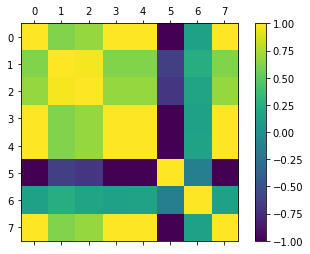

In [10]:
plt.figure(figsize = (16,6))
cor = cov1.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor, vmin=-1, vmax =1)
fig.colorbar(cax)
ticks=np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

In [ ]:
covid19 = pd.read_csv('covid_19_cases.csv')

Text(0.5, 32.09375, 'Covid_data')

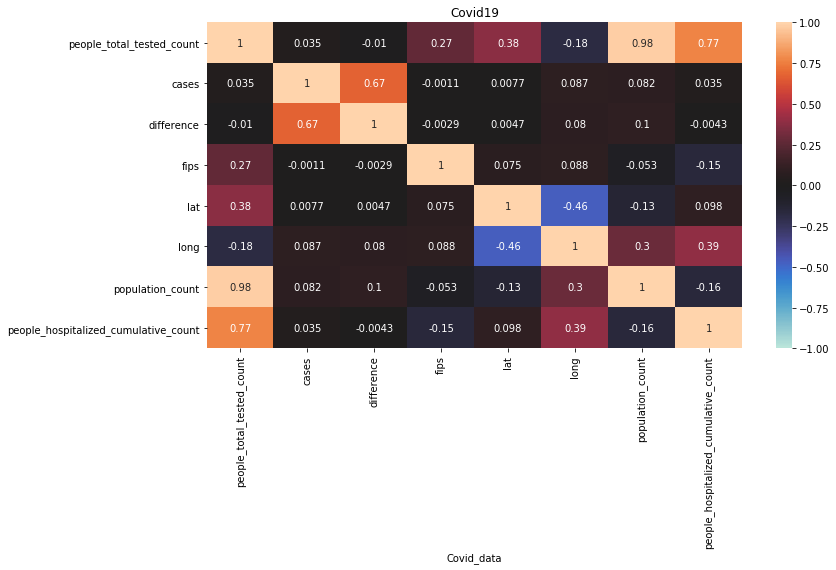

In [14]:
plt.figure(figsize = (12,6))
plt.title("Covid19")
sns.heatmap(covid19.corr(),annot = True,vmin=-1,vmax=1,center=0)
plt.xlabel("Covid_data")